la distribución de Poisson es una distribución de probabilidad que se utiliza para modelar el número de veces que ocurre un evento en un intervalo de tiempo o espacio fijo

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


"""# Asumiendo que tienes una serie de tiempo en la variable `series`
result = seasonal_decompose(series, model='additive')

# Puedes acceder a la tendencia, la estacionalidad y los residuos de la serie de tiempo de esta manera:
trend = result.trend
seasonal = result.seasonal
residual = result.resid"""

"# Asumiendo que tienes una serie de tiempo en la variable `series`\nresult = seasonal_decompose(series, model='additive')\n\n# Puedes acceder a la tendencia, la estacionalidad y los residuos de la serie de tiempo de esta manera:\ntrend = result.trend\nseasonal = result.seasonal\nresidual = result.resid"

In [2]:
df=pd.read_csv('data.csv')

In [4]:
df

,ID,PAY,ACCEPTED
0,786,27.352507,0
1,868,51.939040,1
2,846,24.451818,1
3,249,29.353959,1
4,434,20.568923,1
...,...,...,...
1295,579,25.306900,0
1296,871,36.827302,1
1297,209,20.824530,0
1298,165,26.291693,1


In [12]:
df.head()

,ID,PAY,ACCEPTED
0,786,27.352507,0
1,868,51.939040,1
2,846,24.451818,1
3,249,29.353959,1
4,434,20.568923,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1300 non-null   int64  
 1   PAY       1300 non-null   float64
 2   ACCEPTED  1300 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 30.6 KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1300.0,497.563846,289.749383,1.0,249.000000,494.000000,744.000000,1000.000000
PAY,1300.0,26.626490,9.363111,0.0,20.801887,26.749334,33.348092,53.667563
ACCEPTED,1300.0,0.636154,0.481290,0.0,0.000000,1.000000,1.000000,1.000000


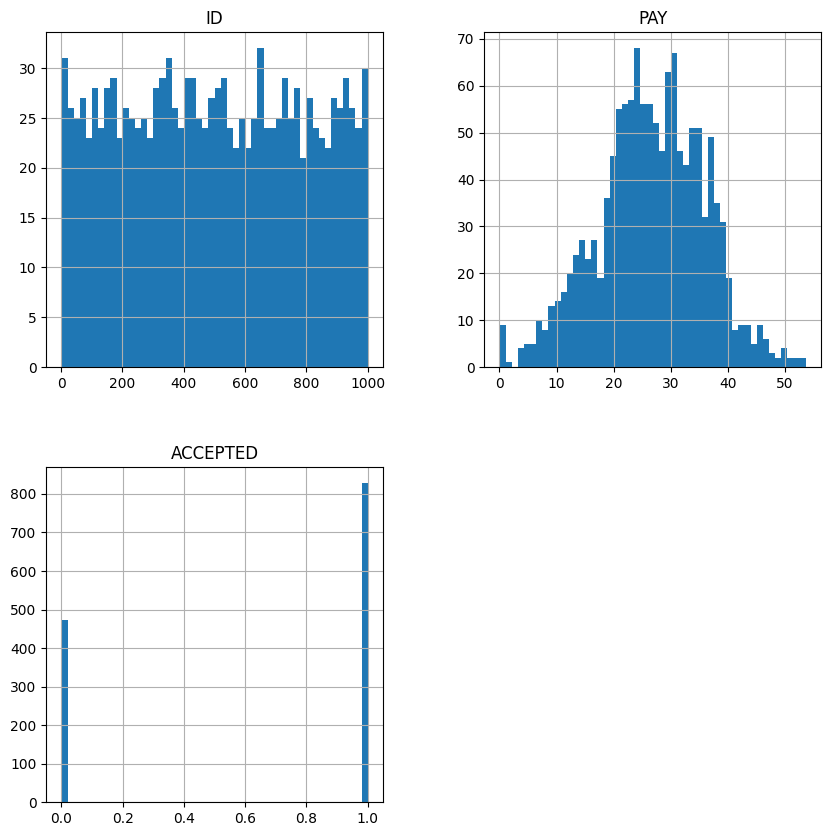

In [17]:
df.hist(figsize=(10,10), bins=50);

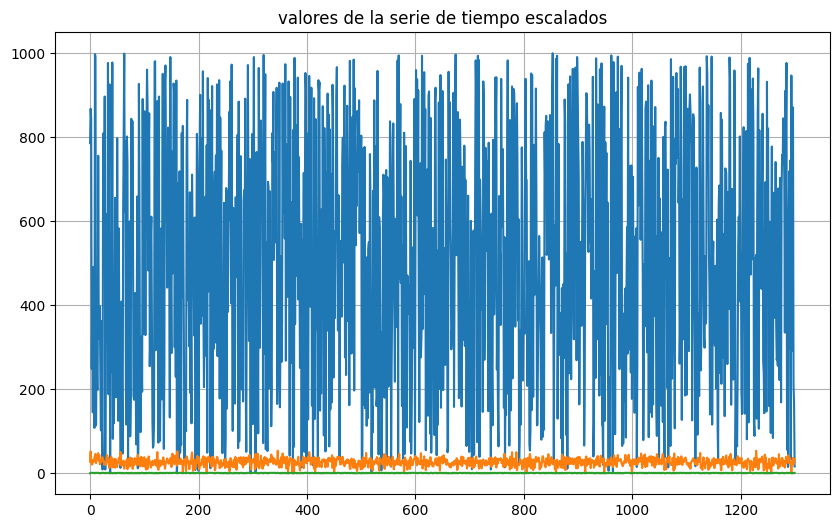

In [25]:
#graficamos la serie de tiempo sin escalar
plt.figure(figsize=(10,6))
plt.plot(df)
plt.title('valores de la serie de tiempo escalados')
plt.grid(True)
plt.show()

In [18]:
df.isna().sum()

ID          0
PAY         0
ACCEPTED    0
dtype: int64

In [22]:
#escalamos variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

,ID,PAY,ACCEPTED
0,0.995851,0.077570,-1.322276
1,1.278963,2.704474,0.756272
2,1.203006,-0.232349,0.756272
3,-0.858188,0.291412,0.756272
4,-0.219460,-0.647210,0.756272


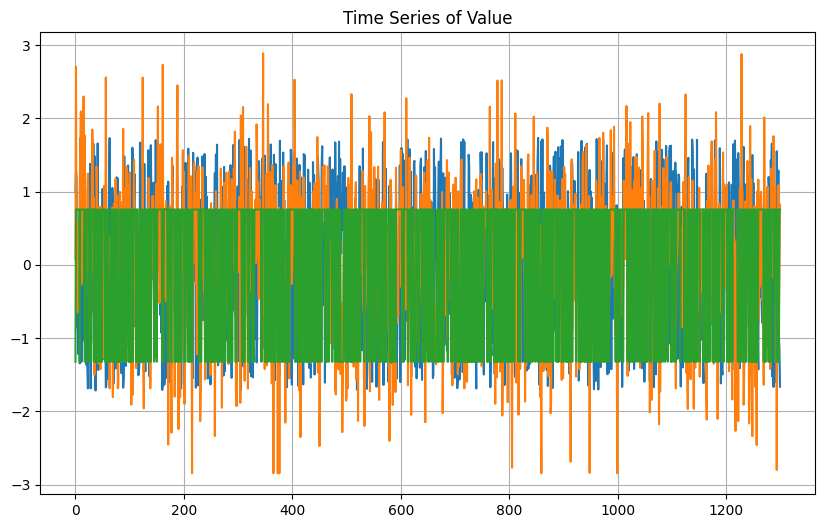

In [24]:
#graficamos la serie de tiempo
plt.figure(figsize=(10,6))
plt.plot(df_scaled)
plt.title('valores de la serie de tiempo escalados')
plt.grid(True)
plt.show()


Se muestra decreciente y con algo de rudio, pudien ser debido a varios factores

In [3]:
#modelo ARIMA

modelo_arima_1 = auto_arima(df["PAY"],
                          seasonal=False,#no hay estacionalidad
                          m=12)#periodo de la estacionalidad
print(modelo_arima_1.summary())

modelo_arima_2 = auto_arima(df["ACCEPTED"], seasonal=False, m=12)
print(modelo_arima_2.summary())




c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1300
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -4750.739
Date:                Sat, 04 May 2024   AIC                           9509.478
Time:                        19:26:44   BIC                           9530.159
Sample:                             0   HQIC                          9517.238
                               - 1300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     27.4297      1.138     24.110      0.000      25.200      29.660
ar.L1          0.0111      0.028      0.395      0.693      -0.044       0.066
ar.L2         -0.0413      0.029     -1.410      0.1

c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1300
Model:               SARIMAX(4, 0, 0)   Log Likelihood                -889.530
Date:                Sat, 04 May 2024   AIC                           1791.059
Time:                        19:26:51   BIC                           1822.080
Sample:                             0   HQIC                          1802.699
                               - 1300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6995      0.240      2.918      0.004       0.230       1.169
ar.L1          0.0127      0.031      0.408      0.683      -0.048       0.074
ar.L2         -0.0284      0.044     -0.644      0.5

In [4]:
#entrenamos con auto-arima

modelo_arima_1 = auto_arima(df["PAY"],
                          m=12, #periodo de la estacionalidad elegido
                          seasonal=True, #hay estacionalidad
                          stepwise=True,#selecciona el mejor modelo 
                          trace=True)#periodo de la estacionalidad   

# Los mejores parámetros se almacenan en los atributos order y seasonal_order de modelo_arima
print(modelo_arima_1.order)
print(modelo_arima_1.seasonal_order)

# Entrenar el modelo ARIMA con los mejores parámetros
modelo_entrenado_1 = modelo_arima_1.fit(df["PAY"])



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=9514.320, Time=4.37 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=9507.862, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=9511.209, Time=1.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=9511.215, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=12375.650, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=9509.317, Time=0.43 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=9509.327, Time=0.22 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=9511.265, Time=1.22 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=9509.724, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=9509.711, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=9511.668, Time=0.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 8.293 seconds
(0, 0, 0)
(0, 0, 0, 12)


In [5]:
#entrenamos con auto-arima

modelo_arima_2 = auto_arima(df["ACCEPTED"],
                          m=12, #periodo de la estacionalidad elegido
                          seasonal=True, #hay estacionalidad
                          stepwise=True,#selecciona el mejor modelo 
                          trace=True)#periodo de la estacionalidad   

# Los mejores parámetros se almacenan en los atributos order y seasonal_order de modelo_arima
print(modelo_arima_2.order)
print(modelo_arima_2.seasonal_order)

# Entrenar el modelo ARIMA con los mejores parámetros
modelo_entrenado_2 = modelo_arima_2.fit(df["ACCEPTED"])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.07 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1790.899, Time=0.10 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1794.188, Time=0.57 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1794.191, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3103.231, Time=0.03 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1792.403, Time=0.28 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1792.419, Time=0.18 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1792.654, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1792.640, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1793.013, Time=0.61 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 6.555 seconds
(0, 0, 0)
(0, 0, 0, 12)


In [6]:
# Hacer predicciones del modelo 

predicciones_1 = modelo_entrenado_1.predict(n_periods=12)#hacemos predicciones a 12 meses en el futuro
mse = mean_squared_error(df["PAY"][len(df["PAY"]) - 12:], predicciones_1)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)


MSE: 85.8150154331741
RMSE: 9.263639426984088


In [7]:
# Hacer predicciones del modelo 

predicciones_2 = modelo_entrenado_2.predict(n_periods=12)#hacemos predicciones a 12 meses en el futuro
mse = mean_squared_error(df["PAY"][len(df["ACCEPTED"]) - 12:], predicciones_2)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)


MSE: 739.986358856679
RMSE: 27.2026902871146


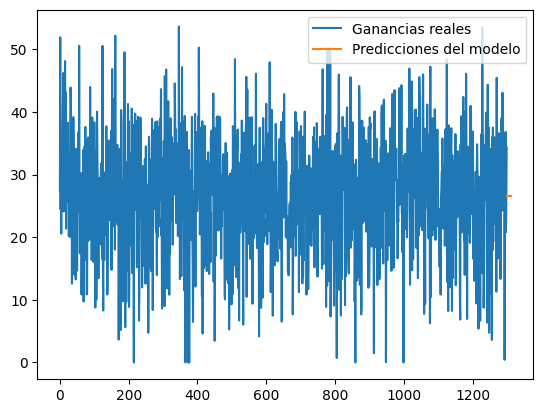

In [8]:
#visualizacion

plt.plot(df["PAY"], label="Ganancias reales")
plt.plot(predicciones_1, label="Predicciones del modelo")
plt.legend()
plt.show()


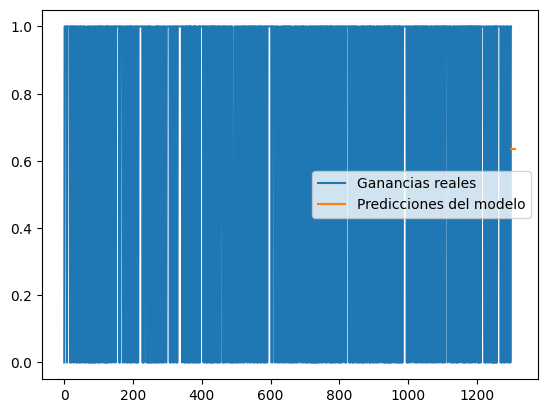

In [69]:
#visualizacion

plt.plot(df["ACCEPTED"], label="Ganancias reales")
plt.plot(predicciones_2, label="Predicciones del modelo")
plt.legend()
plt.show()

# simulacion de ganacias del negocio durante los proximos 12 meses

In [9]:

predicciones_12_meses = modelo_entrenado_1.predict(n_periods=12)#hacemos predicciones a 12 meses en el futuro

#Cálculo de ganancias totales
ganancias_totales = sum(predicciones_12_meses)
print("Ganancias totales previstas para 12 meses:", ganancias_totales)


Ganancias totales previstas para 12 meses: 319.5178833852549


# intentamos con DL

In [1]:
import tensorflow as tf
from scipy.stats import boxcox
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from keras.regularizers import l1, l2

In [3]:
df_dl=pd.read_csv('data.csv')

In [5]:
df_dl.head()

,ID,PAY,ACCEPTED
0,786,27.352507,0
1,868,51.939040,1
2,846,24.451818,1
3,249,29.353959,1
4,434,20.568923,1


In [4]:
df_dl["ACCEPTED"].value_counts()

1    827
0    473
Name: ACCEPTED, dtype: int64

In [5]:
ganancias=df_dl.loc[df_dl['ACCEPTED'] == 1, 'PAY']
perdidas=df_dl.loc[df_dl['ACCEPTED'] == 0, 'PAY']

In [6]:

df_ganacias=pd.DataFrame(ganancias)
df_perdidas=pd.DataFrame(perdidas)

In [7]:
df_ganacias.rename(columns={'PAY':'Ganancias'}, inplace=True)
df_perdidas.rename(columns={'PAY':'Perdidas'}, inplace=True)

In [8]:

# escalamos de los datos
scaler = MinMaxScaler(feature_range=(0, 1))#escalamos los datos entre 0 y 1
#df_scal = scaler.fit_transform(df_dl.values)
df_scal1= scaler.fit_transform(df_ganacias.values)
df_scal2= scaler.fit_transform(df_perdidas.values)


In [9]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_1, test_1 = train_test_split(df_scal1, test_size=0.2, shuffle=False)
train_2, test_2 = train_test_split(df_scal2, test_size=0.2, shuffle=False)

In [10]:
train_1.shape, test_1.shape, train_2.shape, test_2.shape

((661, 1), (166, 1), (378, 1), (95, 1))

In [11]:
df_scaled1=pd.DataFrame(df_scal1, columns=['Ganancias'])
df_scaled2=pd.DataFrame(df_scal2, columns=['Perdidas'])

In [12]:
df_scaled1.shape, df_scaled2.shape

((827, 1), (473, 1))

In [13]:
# convertir una serie de tiempo en un problema de aprendizaje supervisado

look_back = 1#número inicial de pasos de tiempo en los precios abonnados y no abonados que se utilizarán para hacer la predicción

#ganancias
df = pd.DataFrame()#creamos un df vacío
df['t'] = df_scaled1["Ganancias"]#creamos una columna con los valores de la serie de tiempo escalada
for i in range(1, look_back+1): #iteramos sobre el número de pasos de tiempo que se utilizarán para hacer la predicción
    df['t-'+str(i)] = df_scaled1["Ganancias"].shift(i)# creamos nuevas columnas con versiones desplazadas(shift) de la columna "t"
                                            # creando características basadas en los valores de la serie de tiempo en pasos de tiempo anteriores
# Eliminar las filas con valores NaN presentes debido al desplazamiento
df = df.dropna()

# Crear las matrices X e Y
X_1 = df.iloc[:, 1:].values
Y_1 = df.iloc[:, 0].values

In [14]:
#perdidas
df = pd.DataFrame()#creamos un df vacío
df['t'] = df_scaled2["Perdidas"]#creamos una columna con los valores de la serie de tiempo escalada
for i in range(1, look_back+1): #iteramos sobre el número de pasos de tiempo que se utilizarán para hacer la predicción
    df['t-'+str(i)] = df_scaled2["Perdidas"].shift(i)# creamos nuevas columnas con versiones desplazadas(shift) de la columna "t"
                                            # creando características basadas en los valores de la serie de tiempo en pasos de tiempo anteriores
# Eliminar las filas con valores NaN presentes debido al desplazamiento
df = df.dropna()

# Crear las matrices X e Y
X_2 = df.iloc[:, 1:].values
Y_2 = df.iloc[:, 0].values

In [15]:
df_scaled1.shape, df_scaled2.shape

((827, 1), (473, 1))

In [16]:
# Esta función desplaza tus datos 'look_back' (pasos de tiempo, 
# creando así las secuencias de entrada (X) y los objetivos correspondientes (Y)
def create_dataset(df, look_back=1, test_size=0.2):
    
    X, y = df.shift(look_back), df  # Desplaza las filas hacia abajo asignado los valores con el  'look_back' pasos de tiempo
    X = X[look_back:]  # Elimina las primeras 'look_back' filas que son NaN
    y = y[look_back:]  # Elimina las últimas 'look_back' filas para alinear Y con X

    # Divide los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    return X_train.values, X_test.values, y_train.values, y_test.values  # Devuelve los valores de X_train, X_test, Y_train y Y_test

In [17]:
X_train_1, X_test_1, y_train_1, y_test_1 = create_dataset(df_scaled1, look_back=1, test_size=0.2)

In [18]:
X_train_1.shape, X_test_1.shape, y_train_1.shape, y_test_1.shape

((660, 1), (166, 1), (660, 1), (166, 1))

In [19]:
X_train_2, X_test_2, y_train_2, y_test_2 = create_dataset(df_scaled2, look_back=1, test_size=0.2)

In [20]:
X_train_2.shape,   X_test_2.shape, y_train_2.shape, y_test_2.shape

((377, 1), (95, 1), (377, 1), (95, 1))

In [21]:
# Crear secuencias de 3 pasos de tiempo
X_train_sequences_1 = []
for i in range(len(X_train_1) - look_back):#iteramos sobre el número de pasos de tiempo que se utilizarán para hacer la predicción
    X_train_sequences_1.append(X_train_1[i:i+look_back])#creamos secuencias de 3 pasos de tiempo

In [22]:
# Convertir a array y redimensionar
X_train_1 = np.array(X_train_sequences_1)
X_train_1 = np.reshape(X_train_1, (X_train_1.shape[0], 1, look_back))

In [23]:
# Crear secuencias de 3 pasos de tiempo
y_train_sequences_1 = []
for i in range(len(y_train_1) - look_back):#iteramos sobre el número de pasos de tiempo que se utilizarán para hacer la predicción
    y_train_sequences_1.append(y_train_1[i:i+look_back])#creamos secuencias de 3 pasos de tiempo

In [24]:
# Convertir a array y redimensionar
y_train = np.array(y_train_sequences_1)
y_train = np.reshape(y_train, (y_train.shape[0], 1, look_back))

In [25]:
# Crear secuencias de 3 pasos de tiempo
X_test_sequences_1 = []
for i in range(len(X_test_1) - look_back):#iteramos sobre el número de pasos de tiempo que se utilizarán para hacer la predicción
    X_test_sequences_1.append(X_test_1[i:i+look_back])#creamos secuencias de 3 pasos de tiempo

In [26]:
# Convertir a array y redimensionar
X_test = np.array(X_test_sequences_1)
X_test = np.reshape(X_test, (X_test.shape[0], 1, look_back))

In [27]:
# Crear secuencias de 3 pasos de tiempo
y_test_sequences_1 = []
for i in range(len(y_test_1) - look_back):#iteramos sobre el número de pasos de tiempo que se utilizarán para hacer la predicción
    y_test_sequences_1.append(y_test_1[i:i+look_back])#creamos secuencias de 3 pasos de tiempo

In [28]:
X_train_1.shape, y_train_1.shape, X_test_1.shape, y_test_1.shape

((659, 1, 1), (660, 1), (166, 1), (166, 1))

In [29]:
# LO MISMO QUE PARA EL 1 PARA EL 2
X_train_sequences_2 = []
for i in range(len(X_train_2) - look_back):#iteramos sobre el número de pasos de tiempo que se utilizarán para hacer la predicción
    X_train_sequences_2.append(X_train_2[i:i+look_back])#creamos secuencias de 3 pasos de tiempo
    
# Convertir a array y redimensionar
X_train_2 = np.array(X_train_sequences_2)
X_train_2 = np.reshape(X_train_2, (X_train_2.shape[0], 1, look_back))   

print(X_train_2.shape)


# Crear secuencias de 3 pasos de tiempo
y_train_sequences_2 = []
for i in range(len(y_train_2) - look_back):#iteramos sobre el número de pasos de tiempo que se utilizarán para hacer la predicción
    y_train_sequences_2.append(y_train_2[i:i+look_back])#creamos secuencias de 3 pasos de tiempo
    
# Convertir a array y redimensionar
y_train = np.array(y_train_sequences_1)
y_train = np.reshape(y_train, (y_train.shape[0], 1, look_back))   


print(y_train_2.shape)


# Crear secuencias de 3 pasos de tiempo
X_test_sequences_2 = []
for i in range(len(X_test_2) - look_back):#iteramos sobre el número de pasos de tiempo que se utilizarán para hacer la predicción
    X_test_sequences_2.append(X_test_2[i:i+look_back])#creamos secuencias de 3 pasos de tiempo
    
# Convertir a array y redimensionar
X_test_2 = np.array(X_test_sequences_2)
X_test_2 = np.reshape(X_test_2, (X_test_2.shape[0], 1, look_back))   

print(X_test_2.shape)

# Crear secuencias de 3 pasos de tiempo
y_test_sequences_2 = []
for i in range(len(y_test_2) - look_back):#iteramos sobre el número de pasos de tiempo que se utilizarán para hacer la predicción
    y_test_sequences_2.append(y_test_2[i:i+look_back])#creamos secuencias de 3 pasos de tiempo
    
# Convertir a array y redimensionar
y_test_2 = np.array(y_test_sequences_2)
y_test_2 = np.reshape(y_test_2, (y_test_2.shape[0], 1, look_back))   

print(y_test_2.shape)


(376, 1, 1)
(377, 1)
(94, 1, 1)
(94, 1, 1)


In [31]:
X_train_1.shape, y_train_1.shape, X_test_1.shape, y_test_1.shape

((659, 1, 1), (660, 1), (166, 1), (166, 1))

In [33]:
X_train_2.shape, y_train_2.shape, X_test_2.shape, y_test_2.shape

((376, 1, 1), (377, 1), (94, 1, 1), (94, 1, 1))

In [34]:
df_scaled1.shape, df_scaled2.shape

((827, 1), (473, 1))

In [32]:
# Crear y entrenar el modelo LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(1))

optimizador=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    name='Adam',
    clipnorm=1,
    clipvalue=0.5  
    )
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, mode='min')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=0.0001)
list=[early_stopping,reduce_lr]

model.compile(loss='mean_squared_error', optimizer=optimizador, metrics=['mean_squared_error'])
historia=model.fit(X_train_1, y_train_1[:659], epochs=100, batch_size=1, verbose=1, callbacks=list)

Epoch 1/100
659/659 [==============================] - 10s 9ms/step - loss: 0.3878 - mean_squared_error: 0.0280 - lr: 0.0010
Epoch 2/100
659/659 [==============================] - 6s 9ms/step - loss: 0.0271 - mean_squared_error: 0.0222 - lr: 0.0010
Epoch 3/100
659/659 [==============================] - 6s 9ms/step - loss: 0.0238 - mean_squared_error: 0.0216 - lr: 0.0010
Epoch 4/100
659/659 [==============================] - 6s 9ms/step - loss: 0.0232 - mean_squared_error: 0.0216 - lr: 0.0010
Epoch 5/100
659/659 [==============================] - 6s 9ms/step - loss: 0.0228 - mean_squared_error: 0.0215 - lr: 0.0010
Epoch 6/100
659/659 [==============================] - 6s 9ms/step - loss: 0.0223 - mean_squared_error: 0.0211 - lr: 0.0010
Epoch 7/100
659/659 [==============================] - 6s 9ms/step - loss: 0.0222 - mean_squared_error: 0.0211 - lr: 0.0010
Epoch 8/100
659/659 [==============================] - 6s 9ms/step - loss: 0.0221 - mean_squared_error: 0.0211 - lr: 0.0010
Epoch 9

KeyboardInterrupt: 

<Axes: >

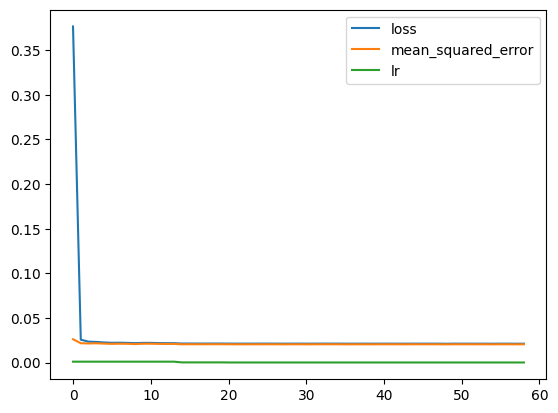

In [111]:
historia=pd.DataFrame(historia.history)
historia[["loss", "mean_squared_error", "lr"]].plot()


In [132]:
# redim,ensioamos para que tenga 3
X_test_1 = np.array(X_test_1)#convertimos a array
X_test_1 = X_test_1.reshape((X_test_1.shape[0], 1, X_test_1.shape[1]))


In [133]:
X_train_1.shape, X_test_1.shape

((657, 1, 3), (166, 1, 1))

In [112]:
# Hacer predicciones
trainPredict = model.predict(X_train_1)
testPredict = model.predict(X_test_1)

21/21 [==============================] - 1s 3ms/step


InvalidArgumentError: Graph execution error:

transpose expects a vector of size 2. But input(1) is a vector of size 3
	 [[{{node transpose}}]]
	 [[sequential_2/lstm_2/PartitionedCall]] [Op:__inference_predict_function_407337]

In [43]:
trainPredict.shape, testPredict.shape

((821, 1), (821, 1))

In [44]:
#lista de comprension para redimensionar los datos como scaler.inverse_transform 
trainPredict = [(subtupla[0], 3, 1) for subtupla in trainPredict]
testPredict = [(subtupla[0], 3, 1) for subtupla in testPredict]

#los pasamos arrays
trainPredict = np.array(trainPredict)
testPredict = np.array(testPredict)

In [54]:
y_train_1= [([x], 3,1) for x in y_train_1]
y_train_1= np.array(y_train_1)

y_test_1=[([x], 3, 1) for x in y_test_1]
y_test_1=np.array(y_test_1)

C:\Users\victo\AppData\Local\Temp\ipykernel_7184\903232826.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_train_1= np.array(y_train_1)
C:\Users\victo\AppData\Local\Temp\ipykernel_7184\903232826.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_test_1=np.array(y_test_1)


In [55]:
trainPredict.shape, testPredict.shape, y_train_1.shape, y_test_1.shape

((821, 3), (821, 3), (824, 3), (824, 3))

In [60]:
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform(test_1)

In [57]:
#invertimos la escala de los datos para obtener los valores reales y tenga sentido
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform(train_1)


In [65]:
testPredict.shape

(821, 3)

In [62]:
# Calcular el error cuadrático medio
trainScore = np.sqrt(mean_squared_error(y_train[:,0], trainPredict[:,661]))#calculamos el RMSE entre las etiquetas verdaderas y las que se ha predecido para cuantificar la diferencia
                                                                            # de valores de la serie temporal
print('Train Score: %.2f RMSE' % (trainScore))

testScore = np.sqrt(mean_squared_error(y_test[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

ValueError: Found input variables with inconsistent numbers of samples: [661, 821]

In [ ]:
# Calcular el meab absolute error percentage y el r2
mape = mean_absolute_percentage_error(y_test[:,0], testPredict[:,0])
print('MAPE: %.2f' % (mape))

r2 = r2_score(y_test[:,0], testPredict[:,0])
print('R2: %.2f' % (r2))

MAPE: 65.07
R2: -0.00
